In [1]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
datasets = !ls ../data/datasets
datasets = [df.split('.')[0] for df in datasets]

df_dict = {df: pd.read_csv("../data/datasets/" + df + ".csv") for df in datasets}
df_dict[datasets[0]].rename(columns={"ID": "ID_CLIENT"}, inplace=True)

In [3]:
data = df_dict[datasets[0]]

data = data.merge(df_dict["D_target"], on="ID_CLIENT", how="right")
data = data.merge(df_dict["D_salary"], on="ID_CLIENT", how="left")

data

,ID_CLIENT,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,TARGET,FAMILY_INCOME,PERSONAL_INCOME
0,106804370,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0,59910150,0,от 10000 до 20000 руб.,5000.0
1,106804370,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0,59910150,0,от 10000 до 20000 руб.,5000.0
2,106804371,32,1,Среднее,Состою в браке,3,3,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,59910230,0,от 10000 до 20000 руб.,12000.0
3,106804372,52,1,Неполное среднее,Состою в браке,4,0,1,0,Иркутская область,Иркутская область,Иркутская область,0,0,59910525,0,от 10000 до 20000 руб.,9000.0
4,106804373,39,1,Высшее,Состою в браке,1,1,1,0,Ростовская область,Ростовская область,Ростовская область,1,0,59910803,0,от 20000 до 50000 руб.,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15518,106819588,25,0,Среднее,Состою в браке,1,1,1,0,Воронежская область,Воронежская область,Воронежская область,0,0,75291424,0,от 10000 до 20000 руб.,12000.0
15519,106819589,51,1,Среднее специальное,Состою в браке,2,0,1,0,Башкирия,Башкирия,Башкирия,0,0,75291888,0,от 20000 до 50000 руб.,10000.0
15520,106819590,22,1,Среднее,Не состоял в браке,1,1,1,0,Брянская область,Брянская область,Брянская область,0,0,75291923,0,от 5000 до 10000 руб.,6000.0
15521,106819591,60,1,Среднее,Вдовец/Вдова,2,0,0,1,Приморский край,Приморский край,Приморский край,1,0,75291960,0,от 10000 до 20000 руб.,4500.0


In [4]:
data_loan = df_dict[datasets[4]]
data_loan = data_loan.merge(df_dict[datasets[1]], on="ID_LOAN", how="inner")
data_loan.head()

,ID_LOAN,ID_CLIENT,CLOSED_FL
0,1753790658,106804370,1
1,1753790659,106804371,1
2,1753790660,106804372,1
3,1753790661,106804372,0
4,1753790662,106804373,1


In [5]:
data_loan = data_loan.groupby("ID_CLIENT").agg({"ID_LOAN": "count", "CLOSED_FL": "sum"})
data = data.merge(data_loan, on="ID_CLIENT", how="left")
data.rename(columns={"ID_LOAN": "LOAN_NUM_TOTAL", "CLOSED_FL": "LOAN_NUM_CLOSED"}, inplace=True)
data.head()

,ID_CLIENT,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,TARGET,FAMILY_INCOME,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106804370,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0,59910150,0,от 10000 до 20000 руб.,5000.0,1,1
1,106804370,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,Оренбургская область,Оренбургская область,0,0,59910150,0,от 10000 до 20000 руб.,5000.0,1,1
2,106804371,32,1,Среднее,Состою в браке,3,3,1,0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,0,0,59910230,0,от 10000 до 20000 руб.,12000.0,1,1
3,106804372,52,1,Неполное среднее,Состою в браке,4,0,1,0,Иркутская область,Иркутская область,Иркутская область,0,0,59910525,0,от 10000 до 20000 руб.,9000.0,2,1
4,106804373,39,1,Высшее,Состою в браке,1,1,1,0,Ростовская область,Ростовская область,Ростовская область,1,0,59910803,0,от 20000 до 50000 руб.,25000.0,1,1


In [6]:
data.drop(columns=["REG_ADDRESS_PROVINCE", "FACT_ADDRESS_PROVINCE",
                   "ID_CLIENT", "POSTAL_ADDRESS_PROVINCE"], inplace=True)
data.head()

,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,TARGET,FAMILY_INCOME,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,59910150,0,от 10000 до 20000 руб.,5000.0,1,1
1,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,59910150,0,от 10000 до 20000 руб.,5000.0,1,1
2,32,1,Среднее,Состою в браке,3,3,1,0,0,0,59910230,0,от 10000 до 20000 руб.,12000.0,1,1
3,52,1,Неполное среднее,Состою в браке,4,0,1,0,0,0,59910525,0,от 10000 до 20000 руб.,9000.0,2,1
4,39,1,Высшее,Состою в браке,1,1,1,0,1,0,59910803,0,от 20000 до 50000 руб.,25000.0,1,1


Выведем информацию о данных, посмотрим на типы колонок и наличие пропусков

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15523 entries, 0 to 15522
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15523 non-null  int64  
 1   GENDER             15523 non-null  int64  
 2   EDUCATION          15523 non-null  object 
 3   MARITAL_STATUS     15523 non-null  object 
 4   CHILD_TOTAL        15523 non-null  int64  
 5   DEPENDANTS         15523 non-null  int64  
 6   SOCSTATUS_WORK_FL  15523 non-null  int64  
 7   SOCSTATUS_PENS_FL  15523 non-null  int64  
 8   FL_PRESENCE_FL     15523 non-null  int64  
 9   OWN_AUTO           15523 non-null  int64  
 10  AGREEMENT_RK       15523 non-null  int64  
 11  TARGET             15523 non-null  int64  
 12  FAMILY_INCOME      15523 non-null  object 
 13  PERSONAL_INCOME    15523 non-null  float64
 14  LOAN_NUM_TOTAL     15523 non-null  int64  
 15  LOAN_NUM_CLOSED    15523 non-null  int64  
dtypes: float64(1), int64(1

Убедимся, что пропусков нет

In [8]:
print('We do not need to worry about missing values.') if data.count().min() == data.shape[0] else print('oops')

We do not need to worry about missing values.


Посмотрим на количество уникальных значений в каждой категориальном столбце

In [9]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

EDUCATION         7
MARITAL_STATUS    5
FAMILY_INCOME     5
dtype: int64

Уникальных значений не так много, можно будет использовать one_hot

Найдем объекты с аномальными значениями

In [10]:
data.describe()

,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,TARGET,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
count,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,1.552300e+04,15523.000000,15523.000000,15523.000000,15523.000000
mean,40.400438,0.653997,1.098886,0.644850,0.909360,0.134639,0.309798,0.116279,6.539832e+07,0.119371,13848.041638,1.387296,0.751594
std,11.607242,0.475709,0.996748,0.812663,0.287105,0.341348,0.462425,0.320771,4.569483e+06,0.324235,8998.618992,0.794241,0.989253
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.991015e+07,0.000000,24.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.191984e+07,0.000000,8000.000000,1.000000,0.000000
50%,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.436952e+07,0.000000,12000.000000,1.000000,0.000000
75%,50.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,6.708832e+07,0.000000,17000.000000,2.000000,1.000000
max,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,7.529224e+07,1.000000,250000.000000,11.000000,11.000000


В колонке *PERSONAL_INCOME* минимальное значение 24 р., скорее всего это опечатка, удалим это значение.

In [11]:
data = data[data["PERSONAL_INCOME"] > 100]

Взглянем на рапсределение классов. Классы несбалансированы

In [12]:
def target_variable_exploration(df, target, positive=1):
    
    positive_class = df[df[target] == positive].shape[0]
    negative_class = df[target].shape[0] - positive_class
    positive_per = positive_class / df.shape[0] * 100
    negative_per = negative_class / df.shape[0] * 100
    
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[target]);
    plt.xlabel("class", size=15, labelpad=15)
    plt.ylabel("count", size=15, labelpad=15)
    plt.xticks([1, 0], [f"Positive {positive_per:.2f}%", f"Negative class {negative_per:.2f}%"])
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    plt.title("Distribuyion of classes", size=15, y=1.05)
    plt.show()

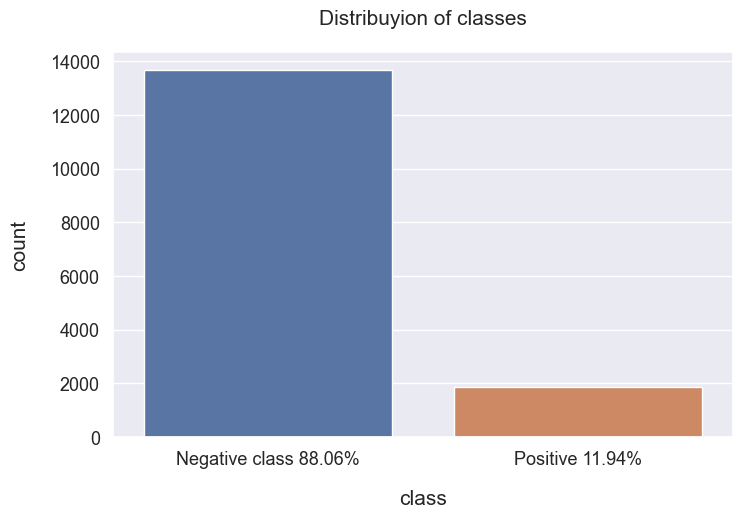

In [13]:
target_variable_exploration(data, "TARGET")

Построим графики распределений числовых признаков

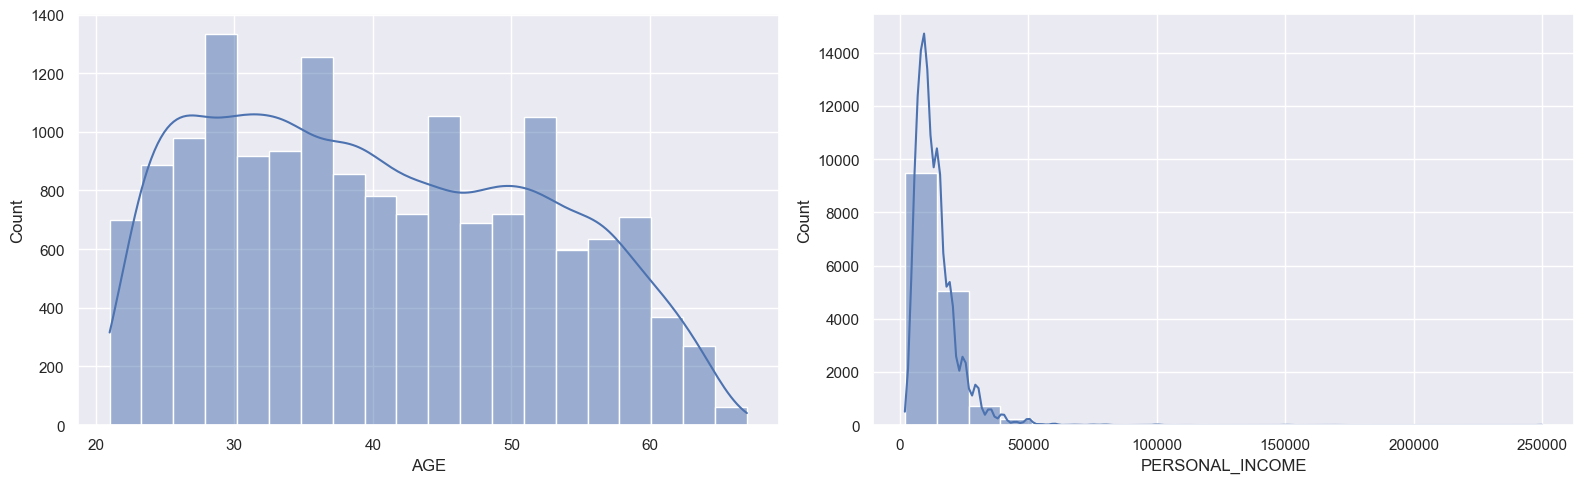

In [14]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=2)
for i, feature in enumerate(["AGE", "PERSONAL_INCOME"]):
    sns.histplot(data[feature].values, bins=20, ax=axs[i], kde=True)
    axs[i].set_xlabel(feature)
plt.tight_layout()

В колонке *PERSONAL_INCOME* есть аномальные значения, удалять их нельзя, потому что доход в размере 250000 реален.
Попробуем прологарифмировать этот признак и добиться нормального распределения.

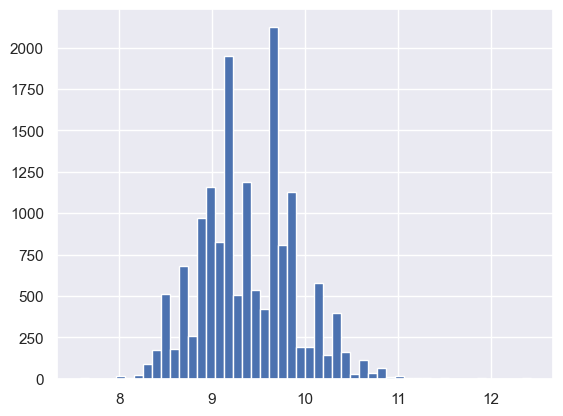

In [15]:
data["PERSONAL_INCOME_LOG"] = np.log1p(data["PERSONAL_INCOME"].values)
data.drop(columns="PERSONAL_INCOME", axis=1, inplace=True)

plt.hist(data["PERSONAL_INCOME_LOG"], bins=50)
plt.show()

In [16]:
feature="PERSONAL_INCOME"
data[feature + "_LOG"]

0         8.517393
1         8.517393
2         9.392745
3         9.105091
4        10.126671
           ...    
15518     9.392745
15519     9.210440
15520     8.699681
15521     8.412055
15522     9.903538
Name: PERSONAL_INCOME_LOG, Length: 15522, dtype: float64

Построим графики зависимостей целевой переменной и признаков

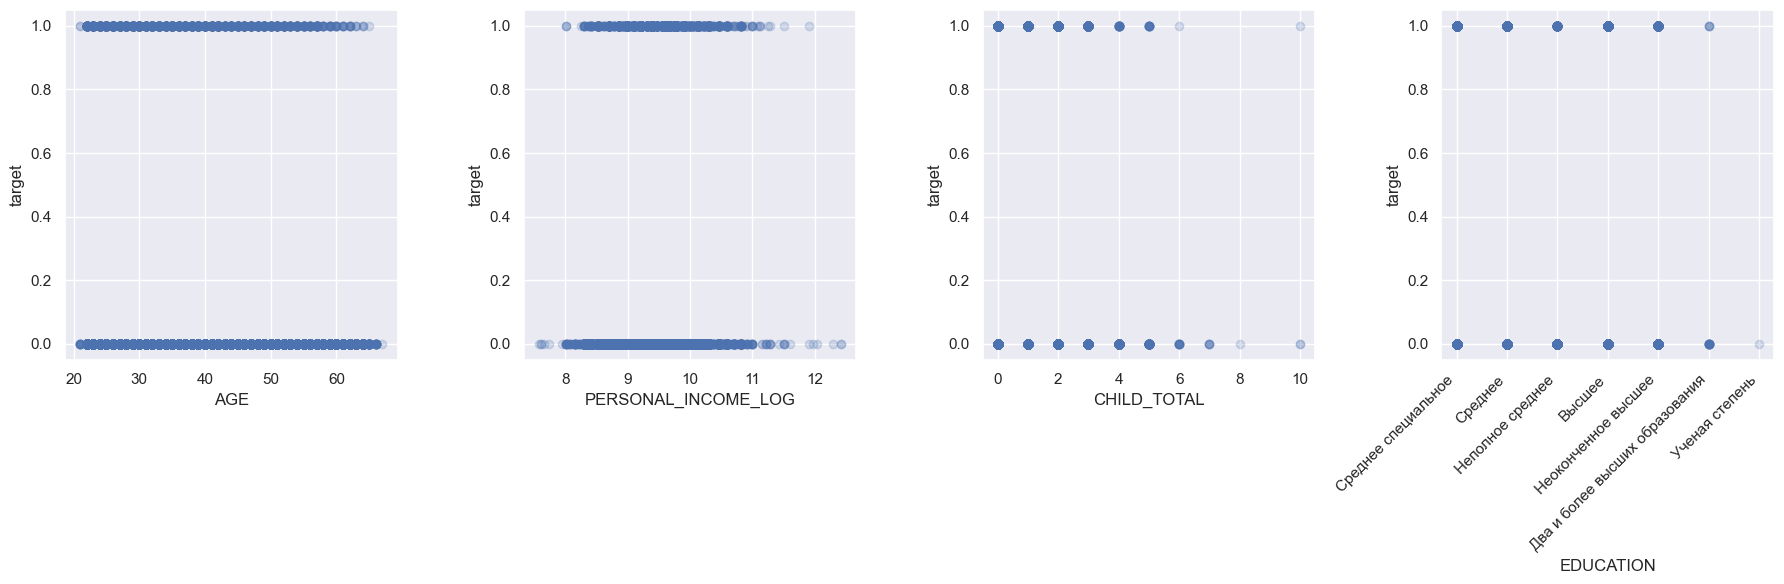

In [17]:
fig, axs = plt.subplots(figsize=(18, 6), ncols=4)
for i, feature in enumerate(["AGE", "PERSONAL_INCOME_LOG", "CHILD_TOTAL", "EDUCATION"]):
    axs[i].scatter(data[feature], data["TARGET"], alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("target")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Явного разбиения по одному признаку нет, но есть некоторые зависимости: люди с более серьезным образованием и большими доходами откликаются на предложения банка реже

Построим матррицу корреляций между числовыми признаками

In [ ]:
corrmat = data[["AGE", "CHILD_TOTAL", "DEPENDANTS",
                "PERSONAL_INCOME_LOG", "LOAN_NUM_TOTAL", "TARGET"]]
#    plt.figure(figsize=(10, 6))
    sns.heatmap(corrmat, square=True, annot=True)
    plt.title("Кореляционная матрица", fontsize=16)
    plt.show()
corr(data)

KeyboardInterrupt: 

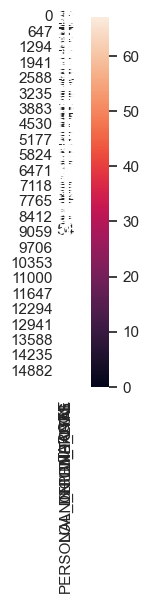

In [21]:
features=("AGE", "CHILD_TOTAL", "DEPENDANTS",
                         "PERSONAL_INCOME_LOG", "LOAN_NUM_TOTAL", "TARGET")
corrmat = data[list(features)]
sns.heatmap(corrmat, square=True, annot=True)
plt.title("Кореляционная матрица", fontsize=16)
plt.show()